In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:\\Users\\soham\\Downloads\\weather.csv')
df 

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [16]:
df.columns

Index(['outlook', 'temperature', 'humidity', 'windy', 'play'], dtype='object')

In [2]:
#one hot encoding over dfobj dataframe consisting of only categorical columns
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore') #create a new oblect of OHE class
X = df[df.columns.tolist()].iloc[:,:-1]  #create new data derived from dfobj
enc.fit(X)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [3]:
enc.categories_

[array(['overcast', 'rainy', 'sunny'], dtype=object),
 array(['cool', 'hot', 'mild'], dtype=object),
 array(['high', 'normal'], dtype=object),
 array([False,  True])]

In [4]:
enc.transform(X).toarray()

array([[1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1.]])

In [5]:
#converting enc.transform array into a proper dataframe
onehotlabels = enc.transform(X).toarray()

new_columns=[]
for col, values in zip(X.columns, enc.categories_):
    new_columns.extend([col + '_' + str(i) for i in values])

df_ohe=pd.DataFrame(onehotlabels, columns=new_columns)
df_ohe

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [23]:
df_comb_ohe = pd.concat([df_ohe, df.iloc[:,[-1]]], axis=1)
df_comb_ohe

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True,play
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,yes
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,yes
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,yes
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,yes
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,yes
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,yes
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,no
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,yes
8,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,no
9,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,no


In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
X=df_ohe.iloc[:,:]
y=df.iloc[:,[-1]]
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [7]:
clf.classes_

array(['no', 'yes'], dtype=object)

In [8]:
clf.n_features_

10

In [9]:
clf.n_classes_

2

In [10]:
clf.n_outputs_

1

[Text(186.0, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(148.8, 152.208, 'X[7] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(74.4, 108.72, 'X[1] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(37.2, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 65.232, 'X[8] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(74.4, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(148.8, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 108.72, 'X[9] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(186.0, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(260.40000000000003, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(223.20000000000002, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 152.208, 'entropy = 0.

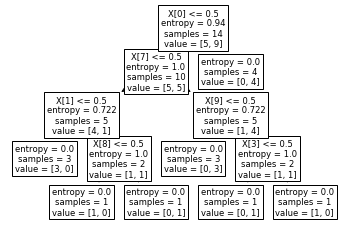

In [13]:
from sklearn import tree
clf=clf.fit(X,y)
tree.plot_tree(clf) 

<font size='5'><b>Site :- https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d</b></font>

In [20]:
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
#check above website to get proper explaination of graphviz trees
import graphviz 
dot_data = tree.export_graphviz(clf,feature_names=df_ohe.columns,  
                                class_names=clf.classes_,filled=True, rounded=True,  
                                special_characters=True, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("weather") 

'weather.pdf'